# Projet MOGPL: la balade du robot

### Sportich Benjamin, de Bézenac Emmanuel

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np

## GENERATION ALEATOIRE D'INSTANCES

## LECTURE DE FICHIER

In [2]:
def readfile(filename):
    with open(filename) as f:
        M,N = [int(x) for x in f.readline().split()] # read first line
        array = []
        i=0
        for line in f: # read rest of lines
            if(i<M):
                array.append(np.array([int(x) for x in line.split()]))
                i+=1
            else:
                iStart,jStart,iEnd,jEnd=[int(line.split()[i]) for i in range(4)]
                startDir=line.split()[4]
                break
    return M,N,np.array(array),iStart,jStart,iEnd,jEnd,startDir

## CREATION & GESTION DU GRAPHE

### Génère le graphe en fonction du tableau d'obstacles

In [13]:
def gen_graph(M,N,A):
    G=nx.DiGraph()
    for i in range(M+1):
        for j in range(N+1):
            #if(A[i][j]==0 and A[i][j-1]==0 and A[i-1][j]==0 and A[i-1][j-1]==0):
            if(True):
                
                #Creation des noeuds - un par direction = 4 par position                
                G.add_node(str(i)+str(j)+'1',direct='N')
                G.add_node(str(i)+str(j)+'2',direct='E')
                G.add_node(str(i)+str(j)+'3',direct='S')
                G.add_node(str(i)+str(j)+'4',direct='O')

                #Creation des arcs
                #Changement de direction                
                G.add_edge(str(i)+str(j)+'1',str(i)+str(j)+'2',action='R')
                G.add_edge(str(i)+str(j)+'1',str(i)+str(j)+'4',action='L')
                G.add_edge(str(i)+str(j)+'2',str(i)+str(j)+'3',action='R')
                G.add_edge(str(i)+str(j)+'3',str(i)+str(j)+'4',action='R')

                G.add_edge(str(i)+str(j)+'2',str(i)+str(j)+'1',action='L')
                G.add_edge(str(i)+str(j)+'4',str(i)+str(j)+'1',action='R')
                G.add_edge(str(i)+str(j)+'3',str(i)+str(j)+'2',action='L')
                G.add_edge(str(i)+str(j)+'4',str(i)+str(j)+'3',action='L')
                
                
                
                #Deplacement
                #Nord/Haut
                if (True): #Teste la presence d'obstacle
                    if(i>=3):
                        G.add_edge(str(i)+str(j)+'1',str(i-3)+str(j)+'1',action='a3')
                    if(i>=2):
                        G.add_edge(str(i)+str(j)+'1',str(i-2)+str(j)+'1',action='a2')
                    if(i>=1):
                        G.add_edge(str(i)+str(j)+'1',str(i-1)+str(j)+'1',action='a1')  
                #Sud/Bas
                if (True):
                    if(i<=M-3):
                        G.add_edge(str(i)+str(j)+'3',str(i+3)+str(j)+'3',action='a3')
                    if(i<=M-2):
                        G.add_edge(str(i)+str(j)+'3',str(i+2)+str(j)+'3',action='a2')
                    if(i<=M-1):
                        G.add_edge(str(i)+str(j)+'3',str(i+1)+str(j)+'3',action='a1')
                #Ouest/Gauche
                #if (A[i][j-1]!=1):
                if(True):
                    if(j>=3):
                        G.add_edge(str(i)+str(j)+'4',str(i)+str(j-3)+'4',action='a3')
                    if(j>=2):
                        G.add_edge(str(i)+str(j)+'4',str(i)+str(j-2)+'4',action='a2')
                    if(j>=1):
                        G.add_edge(str(i)+str(j)+'4',str(i)+str(j-1)+'4',action='a1')
                #Est/Droite
                #if(A[i][j+1]!=1):
                if(True):
                    if(j<=N-3):
                        G.add_edge(str(i)+str(j)+'2',str(i)+str(j+3)+'2',action='a3')
                    if(j<=N-2):
                        G.add_edge(str(i)+str(j)+'2',str(i)+str(j+2)+'2',action='a2')
                    if(j<=N-1):
                        G.add_edge(str(i)+str(j)+'2',str(i)+str(j+1)+'2',action='a1')
                    
                
    return G

## AFFICHAGE DU GRAPHE

In [14]:
def fixed_pos(G): #Assigne des positions aux noeuds du graphe
    fixed_pos={}
    for n in G.nodes():
        if(n[2]=='1'):
            fixed_pos[n]=(int(n[1])*4+1,int(n[0])*4)
        if(n[2]=='2'):
            fixed_pos[n]=(int(n[1])*4+2,int(n[0])*4+1)
        if(n[2]=='3'):
            fixed_pos[n]=(int(n[1])*4+1,int(n[0])*4+2)
        if(n[2]=='4'):
            fixed_pos[n]=(int(n[1])*4,int(n[0])*4+1)        
    return fixed_pos
    
def draw_graph(G,pos,ax,sg=None): #Genere l'affichage du graphe
    for n in G:
        c=Circle(pos[n],radius=0.15,alpha=0.5)
        ax.add_patch(c)
        G.node[n]['patch']=c
        x,y=pos[n]
    seen={}
    for (u,v,d) in G.edges(data=True):
        n1=G.node[u]['patch']
        n2=G.node[v]['patch']
        rad=0.2
        if (u,v) in seen:
            rad=seen.get((u,v))
            rad=(rad+np.sign(rad)*0.1)*-1
        alpha=0.5
        color='k'
        e = FancyArrowPatch(n1.center,n2.center,patchA=n1,patchB=n2,
                            arrowstyle='-|>',
                            connectionstyle='arc3,rad=%s'%rad,
                            mutation_scale=10.0,
                            lw=2,
                            alpha=alpha,
                            color=color)
        seen[(u,v)]=rad
        ax.add_patch(e)
    return e

def show_graph(G): # affiche le graphe
    fig=plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    ax.invert_yaxis()
    draw_graph(G,fixed_pos(G),ax)
    ax.autoscale()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    #plt.savefig("graph.pdf")
    #nx.draw_networkx(G,fixed_pos,ax=axe,arrows=True,node_size=400,font_size=10)
    #nx.draw(G,fixed_pos(G),ax=axe)

## Main

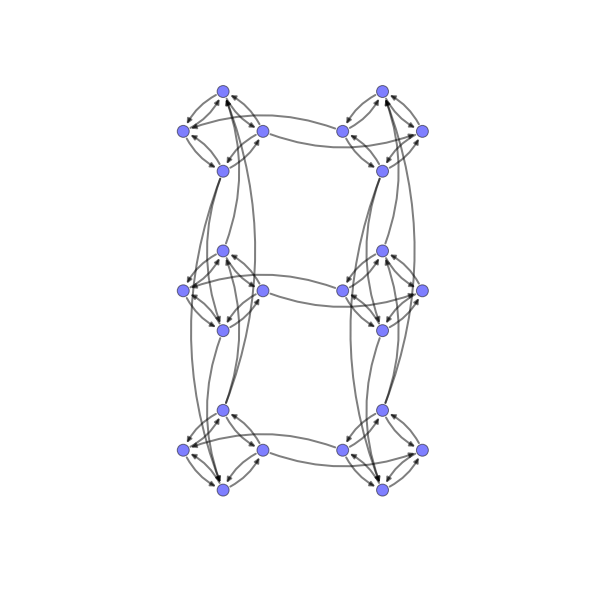

In [15]:
M,N=2,1
A=np.zeros((M,N))
G=gen_graph(M,N,A)
show_graph(G)

## Interface